<a href="https://colab.research.google.com/github/snwclone/ML_experiments/blob/master/Plato_Aristotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

## Find the books

In [0]:
!wget -r -l 2 -A *.txt -F http://classics.mit.edu/Browse/browse-Aristotle.html
!wget -r -l 2 -A *.txt -F http://classics.mit.edu/Browse/browse-Plato.html  
  


--2019-04-21 05:53:50--  http://classics.mit.edu/Browse/browse-Aristotle.html
Resolving classics.mit.edu (classics.mit.edu)... 18.18.187.25
Connecting to classics.mit.edu (classics.mit.edu)|18.18.187.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘classics.mit.edu/Browse/browse-Aristotle.html.tmp’

classics.mit.edu/Br     [ <=>                ]  11.81K  --.-KB/s    in 0s      

2019-04-21 05:53:50 (263 MB/s) - ‘classics.mit.edu/Browse/browse-Aristotle.html.tmp’ saved [12092]

Loading robots.txt; please ignore errors.
--2019-04-21 05:53:50--  http://classics.mit.edu/robots.txt
Reusing existing connection to classics.mit.edu:80.
HTTP request sent, awaiting response... 200 OK
Length: 34 [text/plain]
Saving to: ‘classics.mit.edu/robots.txt’

classics.mit.edu/ro 100%[===================>]      34  --.-KB/s    in 0s      

2019-04-21 05:53:50 (5.42 MB/s) - ‘classics.mit.edu/robots.txt’ saved [34/34]

Removing classics.mit.edu/Br

In [0]:
import os

df = pd.DataFrame()
for label in ['Plato','Aristotle']:
  directory = "/content/classics.mit.edu/" + label
  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
         file = open(os.path.join(directory, filename), 'r')
         parts = [{'texts': paragraph, 'label': label} for paragraph in file.read().split('\n\n') if len(paragraph) > 100]
         df = pd.concat([df, pd.DataFrame(parts)])
   
df.label.value_counts()

Plato        7088
Aristotle    6244
Name: label, dtype: int64

In [0]:
df

,label,texts
0,Plato,"\n<BASE HREF=""http://classics.mit.edu/Plato/se..."
1,Plato,You write to me that I must consider your view...
2,Plato,In my youth I went through the same experience...
3,Plato,"And seeing, as I did, that in quite a short ti..."
4,Plato,Not long after that a revolution terminated th...
5,Plato,As I observed these incidents and the men enga...
6,Plato,With these thoughts in my mind I came to Italy...
7,Plato,"With a mind full of these thoughts, on the top..."
8,Plato,After that event he came to the conclusion tha...
9,Plato,"Holding these sound views, Dion persuaded Dion..."


## Learn to read

First we build a language model. We finetune a pretrained model by exposing it to texts of Aristotle and Plato

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path = "/gdrive/My Drive/"

In [0]:
bs=48


data_lm = (TextList.from_df(df, path, cols='texts')    
            .split_by_rand_pct(valid_pct = 0.2, seed = 42)
            .label_for_lm()            # no need tot distinguish between Plato and Aristotle
            .databunch(bs=bs))

data_lm.save('data_lm.pkl')

In [0]:
bs=48
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


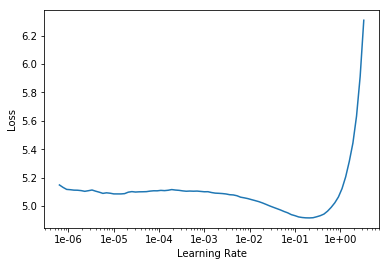

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.928197,3.763594,0.275436,01:26


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.629060,3.611211,0.301113,01:47
1,3.560604,3.530998,0.310932,01:47
2,3.378851,3.401447,0.336653,01:47
3,3.221449,3.335428,0.346958,01:47
4,3.090023,3.306153,0.352086,01:47
5,2.935838,3.294026,0.354259,01:47
6,2.832843,3.291444,0.355031,01:47
7,2.750391,3.300923,0.354324,01:47
8,2.675249,3.307428,0.354527,01:47
9,2.678712,3.310791,0.354365,01:47


In [0]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "The meaning of life, the universe and everything is"
N_WORDS = 40
N_SENTENCES = 10

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

The meaning of life, the universe and everything is evident , and 
  each of these has itself as its source . Some have no difficulty , 
  others say what they say , seeing that the world is full of something ; 
  that it is the
The meaning of life, the universe and everything is evil , and 
  the opposite of what remains , and is in every case perishable . There 
  is no longer any further question ; for they are not the same ; 
  for they have no universal
The meaning of life, the universe and everything is finite . Suppose 
  it is not possible for bodies to exist apart from the one , for it 
  is only in a sense that they are moved , and if they are separated by 
  one another
The meaning of life, the universe and everything is prior to the 
  being of itself . For to being happy is the good of man , and this 
  principle in virtue of which they have just been spoken is that of 
  the stronger , not
The meaning of life, the universe and everything is that of a quality . 
  But we c

We not only have to save the model, but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('fine_tuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
data_clas = (TextList.from_df(df, path, cols='texts', vocab=data_lm.vocab)
            .split_by_rand_pct(valid_pct = 0.2, seed = 42)
            .label_from_df(cols = 'label')         
            .databunch(bs=bs))

data_clas.save('data_clas.pkl')

NameError: ignored

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

text,target
"xxbos xxmaj let us now proceed to maintain that it is possible that there should \n be an infinite motion that is single and continuous , and that this \n motion is rotatory motion . xxmaj the motion of everything that is in process \n of locomotion is either rotatory or rectilinear or a compound of the \n two : consequently , if one of the",Aristotle
"xxbos xxmaj moreover , to claim a ' xxmaj yes ' or ' xxmaj no ' answer is the business not of \n a man who is showing something , but of one who is holding an examination . \n xxmaj for the art of examining is a branch of dialectic and has in view \n not the man who has knowledge , but the ignorant pretender",Aristotle
"xxbos xxmaj in the case of some properties it mostly happens that some error is \n incurred because of a failure to define how as well as to what things \n the property is stated to belong . xxmaj for every one tries to render as \n the property of a thing something that belongs to it either naturally , \n as ' biped ' belongs",Aristotle
"xxbos "" xxmaj what then is xxmaj love ? "" i asked ; "" xxmaj is he mortal ? "" "" xxmaj no . "" "" xxmaj what then ? "" "" xxmaj as \n in the former instance , he is neither mortal nor immortal , but in \n a mean between the two . "" "" xxmaj what is he , xxmaj diotima ? "" """,Plato
"xxbos xxmaj if man exchanges either money for money , or anything whatever for \n anything else , either with or without life , let him give and receive \n them genuine and xxunk , in accordance with the law . xxmaj and let \n us have a prelude about all this sort of xxunk , like the preludes \n of our other laws . xxmaj",Plato


We can then create a model to classify those reviews and load the encoder we saved before.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


None

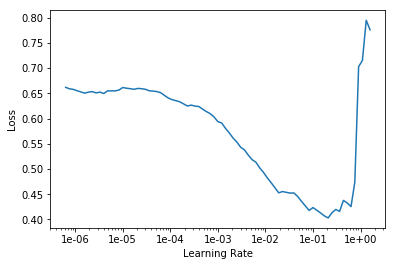

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
display(learn.lr_find())
learn.recorder.plot()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


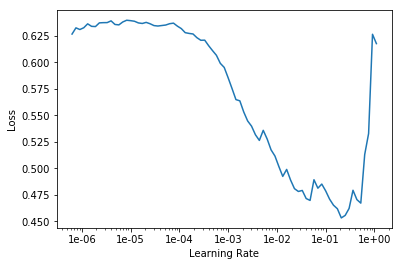

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [0]:
learn.save('final')


In [0]:
learn.load('final')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (10666 items)
x: TextList
xxbos xxmaj you write to me that i must consider your views the same as those 
  of xxmaj dion , and you urge me to aid your cause so far as i can in word 
  and deed . xxmaj my answer is that , if you have the same opinion and desire 
  as he had , i consent to aid your cause ; but if not , i shall think 
  more than once about it . xxmaj now what his purpose and desire was , i can 
  inform you from no mere conjecture but from positive knowledge . xxmaj for 
  when i made my first visit to xxmaj sicily , being then about forty years 
  old , xxmaj dion was of the same age as xxmaj xxunk is now , and the opinion 
  which he then formed was that which he always retained , i mean the 
  belief that the xxmaj syracusans ought to be free and governed by the best 
  laws . xxmaj so it is no matter for surprise if some xxmaj god should make xxmaj xxunk 
  adopt the same opinion as xxmaj dion about forms of govern

In [0]:
learn.predict("It is equally reasonable to assume that this body will be ungenerated and indestructible and exempt from increase and alteration, since everything that comes to be comes into being from its contrary and in some substrate, and passes away likewise in a substrate by the action of the contrary into the contrary, as we explained in our opening discussions. Now the motions of contraries are contrary. If then this body can have no contrary, because there can be no contrary motion to the circular, nature seems justly to have exempted from contraries the body which was to be ungenerated and indestructible. For it is in contraries that generation and decay subsist. Again, that which is subject to increase increases upon contact with a kindred body, which is resolved into its matter. But there is nothing out of which this body can have been generated. And if it is exempt from increase and diminution, the same reasoning leads us to suppose that it is also unalterable. For alteration is movement in respect of quality; and qualitative states and dispositions, such as health and disease, do not come into being without changes of properties. But all natural bodies which change their properties we see to be subject without exception to increase and diminution. This is the case, for instance, with the bodies of animals and their parts and with vegetable bodies, and similarly also with those of the elements. And so, if the body which moves with a circular motion cannot admit of increase or diminution, it is reasonable to suppose that it is also unalterable. ")

(Category Aristotle, tensor(0), tensor([9.9990e-01, 1.0222e-04]))

In [0]:
learn.predict("The point about which you and I differ is of great importance, and I hope that you, Megillus, will help to decide between us. For I maintain that the true life should neither seek for pleasures, nor, on the other hand, entirely avoid pains, but should embrace the middle state, which I just spoke of as gentle and benign, and is a state which we by some divine presage and inspiration rightly ascribe to God. Now, I say, he among men, too, who would be divine ought to pursue after this mean habit-he should not rush headlong into pleasures, for he will not be free from pains; nor should we allow any one, young or old, male or female, to be thus given any more than ourselves, and least of all the newly-born infant, for in infancy more than at any other time the character is engrained by habit. Nay, more, if I were not afraid of appearing to be ridiculous, I would say that a woman during her year of pregnancy should of all women be most carefully tended, and kept from violent or excessive pleasures and pains, and should at that time cultivate gentleness and benevolence and kindness. ")

(Category Plato, tensor(1), tensor([0.0015, 0.9985]))

In [0]:
learn.predict("The individual has always had to struggle to keep from being overwhelmed by the tribe. If you try it, you will be lonely often, and sometimes frightened. But no price is too high to pay for the privilege of owning yourself.")


(Category Plato, tensor(1), tensor([0.2129, 0.7871]))

In [0]:
text = """
Back to the street where we began
Feeling as good as lovers can, you know
Yeah we're feeling so good

Pickin' up things we shouldn't read
It looks like the end of history as we know
It's just the end of the world

Back to the street where we began
Feeling as good as love, you could, you can

Into a place where thoughts can bloom
Into a room where it's nine in the afternoon
And we know that it could be
And we know that it should
And you know that you feel it too
'Cause it's nine in the afternoon

And your eyes are the size of the moon
You could 'cause you can so you do
We're feeling so good
Just the way that we do
When it's nine in the afternoon

Your eyes are the size of the moon
You could 'cause you can so you do
We're feeling so good

Back to the street
Down to our feet
Losing the feeling of feeling unique
Do you know what I mean?

Back to the place
Where we used to say
Man it feels good to feel this way
Now I know what I mean

Back to the street, back to the place,
Back to the room where it all began (hey)
Back to the room where it all began
'Cause it's nine in the afternoon

Your eyes are the size of the moon
You could 'cause you can so you do
We're feeling so good
Just the way that we do
When it's nine in the afternoon

Your eyes are the size of the moon
You could 'cause you can so you do
We're feeling so good
Just the way that we do
When it's nine in the afternoon

Your eyes are the size of the moon
You could 'cause you can so you do
We're feeling so good
Just the way that we do
When it's nine in the afternoon"""

learn.predict(text)


(Category Plato, tensor(1), tensor([0.3906, 0.6094]))

In [0]:
text = """
Oh, well, imagine,
As I'm pacing the pews in a church corridor,
And I can't help but to hear—
No, I can't help but to hear an exchanging of words,

"What a beautiful wedding! What a beautiful wedding," says a bridesmaid to the waiter,
"And, yes, but what a shame, what a shame the poor groom's bride is a whore."

I chime in with a
"Haven't you people ever heard of closing a goddamn door?!"
No, it's much better to face these kinds of things
With a sense of poise and rationality.
I chime in,
"Haven't you people ever heard of closing a goddamn door?!"
No, it's much better to face these kinds of things
With a sense of...

Oh, well, in fact,
Well, I'll look at it this way,
I mean technically our marriage is saved,
Well, this calls for a toast.
So, pour the champagne.

Oh, well, in fact,
Well, I'll look at it this way,
I mean technically our marriage is saved,
Well, this calls for a toast,
So, pour the champagne, pour the champagne!

I chime in with a
"Haven't you people ever heard of closing a goddamn door?!"
No, it's much better to face these kinds of things
With a sense of poise and rationality.
I chime in,
"Haven't you people ever heard of closing a goddamn door?!"
No, it's much better to face these kinds of things
With a sense of poise and rationality again

I chime in,
"Haven't you people ever heard of closing a goddamn door?!"
No, it's much better to face these kinds of things
With a sense of poise and rationality.
I chime in,
"Haven't you people ever heard of closing a goddamn door?!"
No, it's much better to face these kinds of things
With a sense of poise and rationality again...

"""
learn.predict(text)

(Category Plato, tensor(1), tensor([0.0426, 0.9574]))

In [0]:
!wget -r -l 2 -A *.txt -F http://classics.mit.edu/Browse/browse-Virgil.html

--2019-04-12 09:35:49--  http://classics.mit.edu/Browse/browse-Virgil.html
Resolving classics.mit.edu (classics.mit.edu)... 18.18.187.25
Connecting to classics.mit.edu (classics.mit.edu)|18.18.187.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘classics.mit.edu/Browse/browse-Virgil.html.tmp’

classics.mit.edu/Br     [ <=>                ]   4.23K  --.-KB/s    in 0s      

2019-04-12 09:35:49 (257 MB/s) - ‘classics.mit.edu/Browse/browse-Virgil.html.tmp’ saved [4328]

Loading robots.txt; please ignore errors.
--2019-04-12 09:35:49--  http://classics.mit.edu/robots.txt
Reusing existing connection to classics.mit.edu:80.
HTTP request sent, awaiting response... 200 OK
Length: 34 [text/plain]
Saving to: ‘classics.mit.edu/robots.txt’

classics.mit.edu/ro 100%[===================>]      34  --.-KB/s    in 0s      

2019-04-12 09:35:49 (4.64 MB/s) - ‘classics.mit.edu/robots.txt’ saved [34/34]

Removing classics.mit.edu/Browse/brows

In [0]:
df_Virgil = pd.DataFrame()
for label in ['Virgil']:
  directory = "/content/classics.mit.edu/" + label
  for filename in os.listdir(directory):
    if filename.endswith(".txt"):
         file = open(os.path.join(directory, filename), 'r')
         parts = [{'texts': paragraph, 'label': label} for paragraph in file.read().split('\n\n') if len(paragraph) > 100]
         df_Virgil = pd.concat([df_Virgil, pd.DataFrame(parts)])
   
df_Virgil['pred'] = learn()

,label,texts
0,Virgil,Provided by The Internet Classics Archive.\nSe...
1,Virgil,"Meliboeus. \nYou, Tityrus, 'neath a broad beec..."
2,Virgil,"Tityrus. \nO Meliboeus, 'twas a god vouchsafed..."
3,Virgil,"Meliboeus. \nI grudge you not the boon, but ma..."
4,Virgil,"Tityrus. \nThe city, Meliboeus, they call Rome..."
5,Virgil,"Tityrus. \nFreedom, which, though belated, cas..."
6,Virgil,"Meliboeus. \nI used to wonder, Amaryllis, why ..."
7,Virgil,Tityrus. \nWhat could I do? how else from bond...
8,Virgil,"Meliboeus. \nSo in old age, you happy man, you..."
9,Virgil,"Tityrus. \nSooner shall light stags, therefore..."
